In [1]:
from datasets import load_dataset, Dataset

from dataset_builder import DatasetBuilder
from lcdataset import LCDataset
from preprocessing import *
from stats import *
from utils import *

In [ ]:
MMT_PATH = "/home/k/kyselica12/work/mmt/MMT"
IDX = 29517
classes = ["H-2A R/B"]
regexes = None
# preprocessing = Compose(SplitByRotationalPeriod(), FilterFolded(100, 0.75), FilterMinLength(100))
# db = DatasetBuilder(MMT_PATH, norad_ids=[IDX], preprocessing=preprocessing, lazy=False)
preprocessing = Compose(FilterByPeriodicity(Variability.PERIODIC), FilterFolded(100, 0.75), FilterMinLength(100), Fold())
db = DatasetBuilder(MMT_PATH, classes=classes, regexes=regexes, preprocessing=preprocessing, lazy=False)

Loaded 23 objects and 1460 tracks


In [5]:
data_set, _ = db.build_dataset()
stats = [MediumTime(), MediumPhase(), FourierSeries(8, fs=True, amplitude=True)]
data_dict = data_set.to_dict(data_types=[], stats=stats)
ds = Dataset.from_dict(data_dict["data"])
ds = ds.with_format("numpy", columns=["FourierCoefs"])

Preparing data:  85%|████████▍ | 577/680 [00:28<00:05, 20.32it/s]


KeyboardInterrupt: 

{'MediumTime': 1403815694.113347, 'MediumPhase': 32.299694214876034, 'FourierCoefs': array([ 2.72077204,  0.02078222,  0.12740859, -0.29302257,  0.96840613,
       -0.05311706, -0.01073675, -0.285168  , -0.15343505, -0.02273149,
       -0.03689193,  0.06761522, -0.14457755,  0.03863615, -0.00974794,
        0.07086272,  0.0111801 ]), 'Amplitude': 2.6192279914172776}


(<Figure size 1000x1000 with 5 Axes>,
 array([<Axes: title={'center': 'Track 540607, NORAD: 29517'}, xlabel='Time [sec]', ylabel='Magnitude'>,
        <Axes: title={'center': 'Residuals: (RMS: 0.40, max: 1.75) '}, xlabel='Time [sec]', ylabel='Δ Magnitude'>,
        <Axes: title={'center': 'Phase vs Magnitude'}, xlabel='Phase', ylabel='Mag'>,
        <Axes: title={'center': 'Phase'}, xlabel='Time [sec]', ylabel='Phase [Deg]'>,
        <Axes: title={'center': 'Discance'}, xlabel='Time [sec]', ylabel='Distance [km]'>],
       dtype=object))

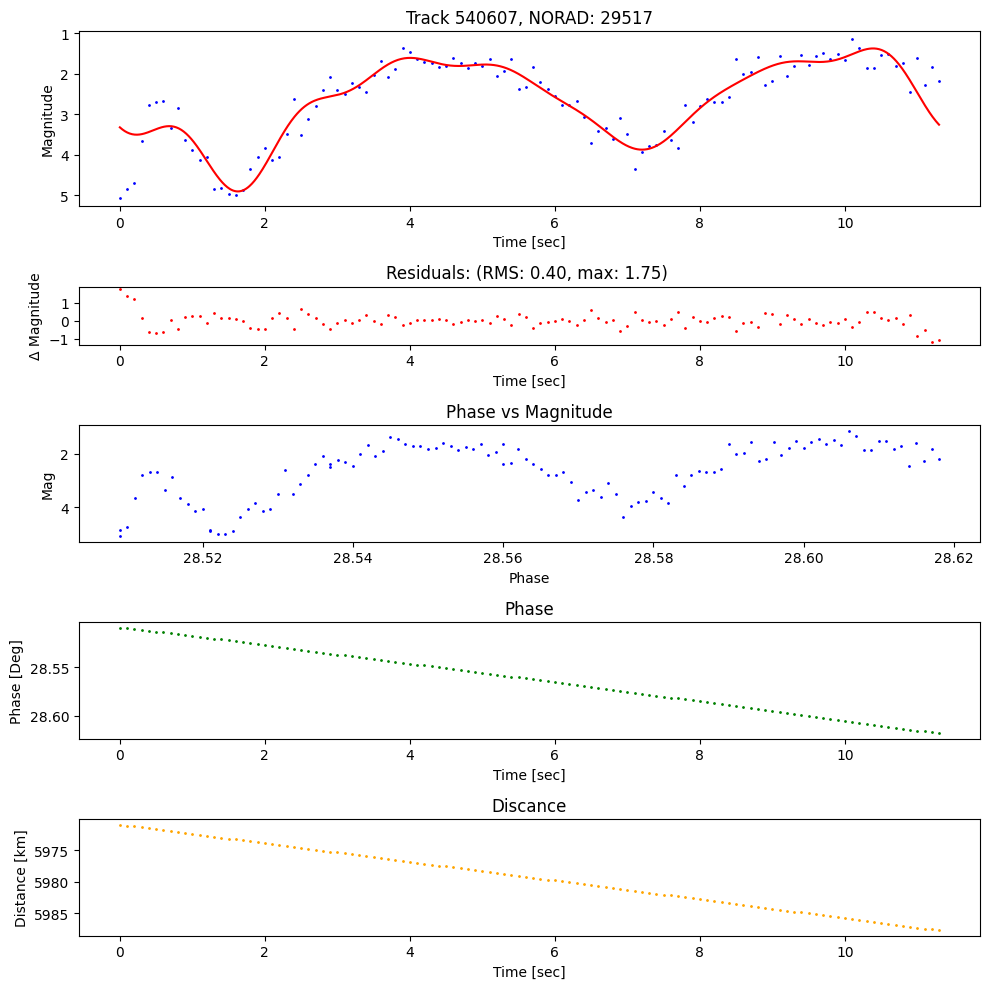

In [13]:
print(data_set.tracks[540607][0].stats)
TRACK_IDX = 540607
plot_track(data_set.tracks[TRACK_IDX][0], mag=True, phase=True, dist=True,fourier=True, mag_phase=True)

In [5]:
data_set.to_file(f"CZ-3B_{IDX}", [])
# data_set.to_file(f"CZ-3B_{IDX}", [DataType.MAG, DataType.PHASE])

In [6]:
data_dict = LCDataset.dict_from_file(f"CZ-3B_{IDX}")
ds2 = Dataset.from_dict(data_dict["data"])

In [ ]:
def f(X):
    X["a0"] = X["FourierCoefs"][0]
    return X

ds = ds.map(f)

Map:   0%|          | 0/4207 [00:00<?, ? examples/s]

In [5]:
ds = ds.remove_columns("FourierCoefs")
ds

Dataset({
    features: ['id', 'norad_id', 'label', 'period', 'timestamp', 'start_idx', 'end_idx', 'Amplitude', 'MediumPhase', 'MediumTime', 'a0'],
    num_rows: 4207
})

In [6]:
ds = ds.with_format("numpy", columns=["a0", "MediumPhase", "MediumTime"])

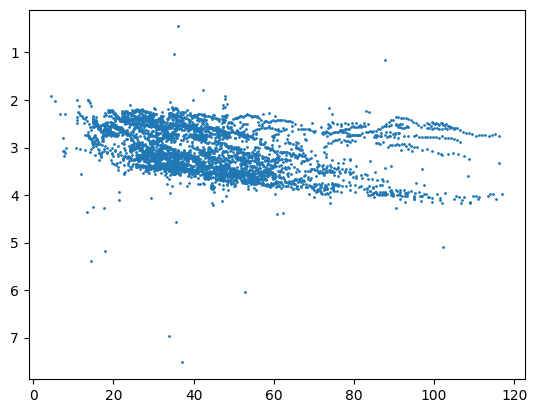

In [10]:
import matplotlib.pyplot as plt

# smaller points
plt.scatter(ds["MediumPhase"], ds["a0"], s=1)
plt.gca().invert_yaxis()